In [19]:
import pandas as pd
!pip install catboost
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import catboost
from sklearn.metrics import recall_score, r2_score
from sklearn.model_selection import train_test_split


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
df = pd.read_csv('train_dataset_train.csv', nrows=1000000)
df

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,72288FA5C4EDBA23A9DF27DC387A53B2,КОШЕЛЕК,410,Печатники,10016,Печатники,10,Люблинско-Дмитровская,2022-09-18 08:13:41,644.733333,6011
999996,999997,D5D325E0255C0274E356672CC95AFA57,30 дней СК студента,2108,Жулебино(Первый),7005,Жулебино,7,Таганско-Краснопресненская,2022-09-18 08:13:41,305.533333,7004
999997,999998,CD42263E1E3E77E43149DAF7757FDF7B,КОШЕЛЕК,148,Измайловская ( Западный ),3004,Измайловская,3,Арбатско-Покровская,2022-09-18 08:13:42,466.366667,3006
999998,999999,0FE2339538854E2745A52D23361C88E7,30 дней ЕДИНЫЙ ТК,127,Киевская Г/З ( Город ),3005,Киевская,3,Арбатско-Покровская,2022-09-18 08:13:42,708.483333,2018


In [21]:
df[df.isna()==True].count()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [22]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество значений: {df[col].nunique()}")
   

Характеристика: id
Количество значений: 1000000
Характеристика: ticket_id
Количество значений: 326155
Характеристика: ticket_type_nm
Количество значений: 60
Характеристика: entrance_id
Количество значений: 426
Характеристика: entrance_nm
Количество значений: 426
Характеристика: station_id
Количество значений: 276
Характеристика: station_nm
Количество значений: 245
Характеристика: line_id
Количество значений: 16
Характеристика: line_nm
Количество значений: 16
Характеристика: pass_dttm
Количество значений: 260880
Характеристика: time_to_under
Количество значений: 60507
Характеристика: label
Количество значений: 276


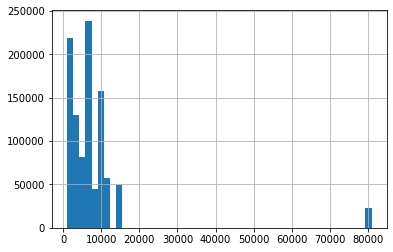

In [23]:
df["label"].hist(bins = 50)

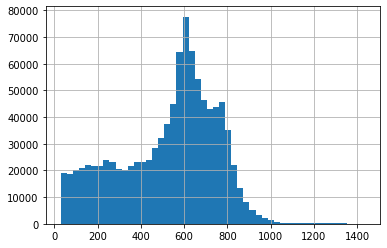

In [24]:
df["time_to_under"].hist(bins = 50)

In [25]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [26]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

In [27]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,40,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,53,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,38,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [28]:
df.ticket_type_nm.nunique()

60

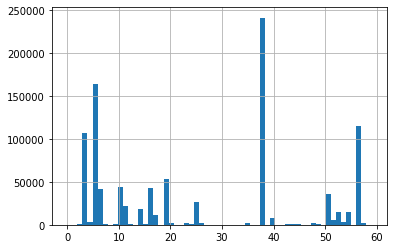

In [29]:
df.ticket_type_nm.hist(bins=60)

In [30]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,40,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,53,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,26,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,38,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [31]:
df = pd.get_dummies(df, prefix = 'ticket', columns = ['ticket_type_nm'])
df = pd.get_dummies(df, prefix = 'station', columns = ['station_id'])

df['pass_dttm'] = pd.to_datetime(df['pass_dttm'])
df['hour'] = df['pass_dttm'].dt.hour

df['time_of_day'] = df['hour'].apply(
    lambda hour: 'AM' if hour>=0 and hour<=7 else 'PM' )

df = df.drop(columns = 'pass_dttm')

df = pd.get_dummies(df, prefix = 'time_of_day', columns = ['time_of_day'])

df



,id,ticket_id,entrance_id,entrance_nm,station_nm,line_id,line_nm,time_to_under,label,ticket_0,...,station_81010,station_81011,station_81012,station_81013,station_81014,station_81015,station_81016,hour,time_of_day_AM,time_of_day_PM
0,1,40BD89EC85646EFB69E283F39C298E60,2402,Лефортово БКЛ,Лефортово,11,Большая кольцевая,216.316667,8001,0,...,0,0,0,0,0,0,0,5,1,0
1,2,126727A96489CC976A8C08E5CEB00542,110,Войковская ( Южный ),Войковская,2,Замоскворецкая,648.183333,9011,0,...,0,0,0,0,0,0,0,5,1,0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,110,Войковская ( Южный ),Войковская,2,Замоскворецкая,865.333333,7022,0,...,0,0,0,0,0,0,0,5,1,0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,110,Войковская ( Южный ),Войковская,2,Замоскворецкая,1048.233333,2022,0,...,0,0,0,0,0,0,0,5,1,0
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,110,Войковская ( Южный ),Войковская,2,Замоскворецкая,965.600000,2017,0,...,0,0,0,0,0,0,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,72288FA5C4EDBA23A9DF27DC387A53B2,410,Печатники,Печатники,10,Люблинско-Дмитровская,644.733333,6011,0,...,0,0,0,0,0,0,0,8,0,1
999996,999997,D5D325E0255C0274E356672CC95AFA57,2108,Жулебино(Первый),Жулебино,7,Таганско-Краснопресненская,305.533333,7004,0,...,0,0,0,0,0,0,0,8,0,1
999997,999998,CD42263E1E3E77E43149DAF7757FDF7B,148,Измайловская ( Западный ),Измайловская,3,Арбатско-Покровская,466.366667,3006,0,...,0,0,0,0,0,0,0,8,0,1
999998,999999,0FE2339538854E2745A52D23361C88E7,127,Киевская Г/З ( Город ),Киевская,3,Арбатско-Покровская,708.483333,2018,0,...,0,0,0,0,0,0,0,8,0,1


In [32]:


X = df.drop(columns=['time_to_under', 'label', 'ticket_id', 'entrance_nm', 'station_nm' , 'line_nm','hour'])
y = df['time_to_under']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X                                                   


,id,entrance_id,line_id,ticket_0,ticket_1,ticket_2,ticket_3,ticket_4,ticket_5,ticket_6,...,station_81006,station_81010,station_81011,station_81012,station_81013,station_81014,station_81015,station_81016,time_of_day_AM,time_of_day_PM
0,1,2402,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,110,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,410,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999996,999997,2108,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999997,999998,148,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999998,999999,127,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
clf = catboost.CatBoostRegressor()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

r2 = r2_score(y_test, y_predict)
r2

Learning rate set to 0.115267
0:	learn: 219.0016772	total: 105ms	remaining: 1m 44s
1:	learn: 213.2082047	total: 192ms	remaining: 1m 35s
2:	learn: 208.6393297	total: 274ms	remaining: 1m 31s
3:	learn: 204.9811509	total: 368ms	remaining: 1m 31s
4:	learn: 200.9120340	total: 460ms	remaining: 1m 31s
5:	learn: 197.6388304	total: 554ms	remaining: 1m 31s
6:	learn: 195.0906922	total: 644ms	remaining: 1m 31s
7:	learn: 193.0755632	total: 732ms	remaining: 1m 30s
8:	learn: 191.3595152	total: 825ms	remaining: 1m 30s
9:	learn: 189.9708560	total: 930ms	remaining: 1m 32s
10:	learn: 187.7740912	total: 1.02s	remaining: 1m 32s
11:	learn: 185.8941192	total: 1.12s	remaining: 1m 31s
12:	learn: 184.9383734	total: 1.21s	remaining: 1m 31s
13:	learn: 184.1445524	total: 1.29s	remaining: 1m 30s
14:	learn: 182.7683136	total: 1.39s	remaining: 1m 31s
15:	learn: 181.3853648	total: 1.48s	remaining: 1m 31s
16:	learn: 180.5598965	total: 1.57s	remaining: 1m 30s
17:	learn: 179.9057892	total: 1.65s	remaining: 1m 30s
18:	lear

0.5150961658121485

In [34]:
X = df.drop(columns=['time_to_under', 'label', 'ticket_id', 'entrance_nm', 'station_nm' , 'line_nm','hour'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                                    
clf = RandomForestClassifier(n_estimators = 3)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)                                                                    

In [35]:
recall = recall_score(y_test, y_predict, average='micro')
recall

0.049986666666666665

In [36]:
score = 0.5*(recall+r2)
score

0.28254141623940754